This notebook attempts to illustrate the when multiple features are correlated, their combination doesn't improve classification performance.

In [53]:
from eda_imports import *

# Define some utility plotting functions

In [2]:
def plot_xlgr(ax, df):
    df_n = df.query('label == 0')
    df_t = df.query('label == 1')
    
    ax.scatter(x=df_n.feat1.values, y=df_n.label.values, color='blue', s=8)
    ax.scatter(x=df_t.feat1.values, y=df_t.label.values, color='red', s=8)
    ax.set_yticks([0, 1])
    ylim = ax.get_ylim()
    
    # visualize lgr
    sorted_df = df.sort_values('feat1')
    X = sorted_df.feat1.values.reshape(-1, 1)
    y = sorted_df.label.values
    clf = LogisticRegression(C=1, penalty='l1').fit(X, y)
    coef = clf.coef_[0][0]
    intercept = clf.intercept_[0]
    ax.plot(X.ravel(), coef * X.ravel() + intercept, color='black', lw=1, label='fitted line')
    ax.plot(X.ravel(), clf.predict_proba(X)[:,1], color='magenta', lw=1, label='prob')
    
    acc = metrics.accuracy_score(clf.predict(X), y)
    ax.text(0.05, 0.6, 'lgr_acc = {0:.3f}'.format(acc), transform=ax.transAxes)
    
    ax.set_ylim(ylim)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('P', rotation=0)
    ax.set_xticklabels([])
    
    return acc

In [3]:
def plot_xhist(ax, df):
    df_n = df.query('label == 0')
    df_t = df.query('label == 1')
    feat1_n = df_n.feat1.values
    feat1_t = df_t.feat1.values
    
    xbins = np.linspace(df.feat1.min(), df.feat1.max(), 30)
    _ = ax.hist(feat1_n, bins=xbins, color='blue', alpha=0.5)
    _ = ax.hist(feat1_t, bins=xbins, color='red', alpha=0.5)
    ylim = ax.get_ylim()
    
    # visualize decision tree
    sorted_df = df.sort_values('feat1')
    X = sorted_df.feat1.values.reshape(-1, 1)
    y = sorted_df.label.values
    clf = DecisionTreeClassifier(max_depth=1).fit(X, y)
    cutoff = clf.tree_.threshold[0]
    ax.plot([cutoff, cutoff], [-100, 100], color='black', lw=1, label='fitted line')

    # prob for DT doesn't seem useful, the chagne is too abrupt
    # ax2 = ax.twinx()
    # ax2.plot(X.ravel(), clf.predict_proba(X)[:,1], color='black', lw=1, label='prob')
    
    acc = metrics.accuracy_score(clf.predict(X), y)
    ax.text(0.05, 0.7, 'dt_acc = {0:.3f}'.format(acc), transform=ax.transAxes)
    
    ax.set_ylim(ylim)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('#', rotation=0)
    ax.set_xticklabels([])

In [4]:
def plot_ylgr(ax, df):
    df_n = df.query('label == 0')
    df_t = df.query('label == 1')
    
    ax.scatter(x=df_n.label.values, y=df_n.feat2.values, color='blue', s=8)
    ax.scatter(x=df_t.label.values, y=df_t.feat2.values, color='red', s=8)
    ax.invert_xaxis()
    ax.set_xticks([0, 1])
    xlim = ax.get_xlim()
    
    # visualize lgr
    sorted_df = df.sort_values('feat2')
    X = sorted_df.feat2.values.reshape(-1, 1)
    y = sorted_df.label.values
    clf = LogisticRegression(C=1, penalty='l1').fit(X, y)
    coef = clf.coef_[0][0]
    intercept = clf.intercept_[0]
    ax.plot(coef * X.ravel() + intercept, X.ravel(), color='black', lw=1, label='fitted line')
    ax.plot(clf.predict_proba(X)[:,1],    X.ravel(), color='magenta', lw=1, label='prob')
    
    acc = metrics.accuracy_score(clf.predict(X), y)
    ax.text(0, 1.05, 'lgr_acc \n= {0:.3f}'.format(acc), transform=ax.transAxes)
    
    ax.set_xlim(xlim)
    ax.set_xlabel('P')
    ax.set_yticklabels([])
    
    return acc

In [5]:
def plot_yhist(ax, df):
    df_n = df.query('label == 0')
    df_t = df.query('label == 1')
    feat2_n = df_n.feat2.values
    feat2_t = df_t.feat2.values
    
    
    bins = np.linspace(df.feat2.min(), df.feat2.max(), 30)
    _ = ax.hist(feat2_n, bins=bins, color='blue', alpha=0.5, orientation='horizontal')
    _ = ax.hist(feat2_t, bins=bins, color='red', alpha=0.5, orientation='horizontal')
    xlim = ax.get_xlim()
    
    # visualize decision tree
    sorted_df = df.sort_values('feat2')
    X = sorted_df.feat2.values.reshape(-1, 1)
    y = sorted_df.label.values
    clf = DecisionTreeClassifier(max_depth=1).fit(X, y)
    cutoff = clf.tree_.threshold[0]
    ax.plot([-100, 100], [cutoff, cutoff], color='black', lw=1, label='fitted line')

    acc = metrics.accuracy_score(clf.predict(X), y)
    ax.text(0, 1.05, 'dt_acc \n= {0:.3f}'.format(acc), transform=ax.transAxes)
    
    ax.set_xlim(xlim)
    ax.invert_xaxis()
    ax.set_xlabel('#')
    ax.set_yticklabels([])

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_scatter(ax, df):
    df_n = df.query('label == 0')
    df_t = df.query('label == 1')
    feat1_n = df_n.feat1.values
    feat1_t = df_t.feat1.values
    feat2_n = df_n.feat2.values
    feat2_t = df_t.feat2.values
    
    # visualize 2D logistic regression
    X = df[['feat1', 'feat2']].values
    y = df.label.values
    clf = LogisticRegression(C=1, penalty='l1').fit(X, y)
    
    w0 = clf.intercept_
    w1, w2 = clf.coef_[0]
    
    _x1s = np.arange(min(X[:,0]) - 2, max(X[:,0]) + 2, 0.5)
    _x2s = np.arange(min(X[:,1]) - 2, max(X[:,1]) + 2, 0.5)
    
    # for drawing hyperplane
    x1s = _x1s
    x2s = - (w0 + w1 * x1s) / w2
    
    # for drawing sigmoid probability
    xx1, xx2 = np.meshgrid(_x1s, _x2s)
    probs = sigmoid(w1 * xx1 + w2 * xx2 + w0)

    ctf = ax.contourf(xx1, xx2, probs, 30, cmap='gray', alpha=1)
        
    ax.scatter(feat1_n, feat2_n, color='blue', alpha=0.7, edgecolors='white', lw=3, s=8)
    ax.scatter(feat1_t, feat2_t, color='red', alpha=0.7, edgecolors='white', lw=3, s=8)
    
    ylim = ax.get_ylim()
    ax.plot(x1s, x2s, '--', color='yellow', lw=2, label='hyperplane')
    ax.set_ylim(ylim)
    
    ax.scatter(feat1_n, feat2_n, color='blue', s=8)
    ax.scatter(feat1_t, feat2_t, color='red', s=8)
    
    acc = metrics.accuracy_score(clf.predict(X), y)
    corr = np.corrcoef(np.concatenate([feat1_n, feat1_t]), np.concatenate([feat2_n, feat2_t]))
    ax.text(0.65, 0.05, 'lgr_acc = {0:.3f}\ncorr = {1:.3f}'.format(acc, corr[0][1]), transform=ax.transAxes)
    
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('feat 2')
    ax.set_xlabel('feat 1', rotation=0)
    
    return acc

# Visualization of DecisionTree boundry and Logistic regression boundry in one plot

In [7]:
feat1_n_mean, feat1_t_mean = [0, 1]
feat2_n_mean, feat2_t_mean = [1, 0]

In [40]:
cov = [[1, -0.5], [-0.5, 1]]
samples_n = np.random.multivariate_normal([feat1_n_mean, feat2_n_mean], cov, 50)
samples_t = np.random.multivariate_normal([feat1_t_mean, feat2_t_mean], cov, 100)

In [41]:
df_n = pd.DataFrame(samples_n, columns=['feat1', 'feat2'])
df_n['label'] = 0
df_t = pd.DataFrame(samples_t, columns=['feat1', 'feat2'])
df_t['label'] = 1
df = pd.concat([df_n, df_t])

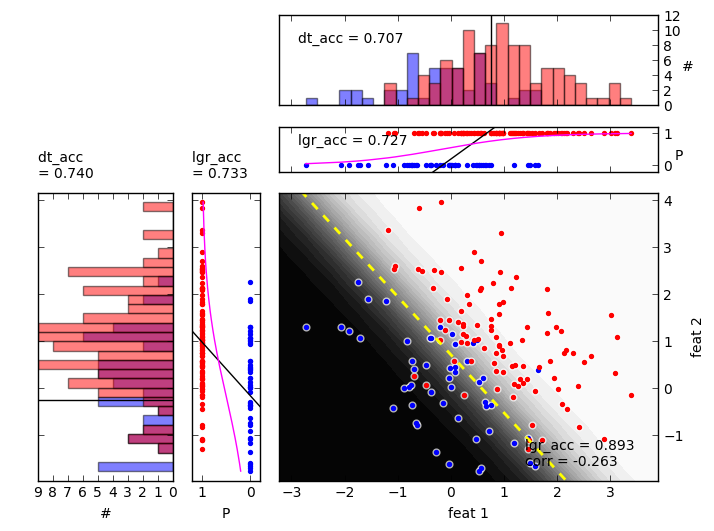

In [42]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.5, 3.2], width_ratios=[1, 0.5, 2.8], wspace=0.1, hspace=0.15)
(_1, _2, ax_xhist,
 _3, _4, ax_xlgr,
 ax_yhist, ax_ylgr, ax_scatter) = [plt.subplot(_) for _ in gs]
for _ in [_1, _2, _3, _4]:
    _.axis('off')

plot_xlgr(ax_xlgr, df)
plot_xhist(ax_xhist, df)

plot_ylgr(ax_ylgr, df)
plot_yhist(ax_yhist, df)

plot_scatter(ax_scatter, df)

for ax in [ax_xlgr, ax_xhist, ax_scatter]:
    ax.set_xlim(df.feat1.min() - 0.5, df.feat1.max() + 0.5)
    
for ax in [ax_ylgr, ax_yhist, ax_scatter]:
    ax.set_ylim(df.feat2.min() - 0.2, df.feat2.max() + 0.2)

abbr:
1. dt: decision tree
1. lgr: logistic regression
1. acc: accuracy

# When both variance and co-variance is 0

In [43]:
cov = [[0, 0], [0, 0]]

In [44]:
samples_n = np.random.multivariate_normal([0, 1], cov, 50)
samples_t = np.random.multivariate_normal([1, 0], cov, 100)

In [45]:
df_n = pd.DataFrame(samples_n, columns=['feat1', 'feat2'])
df_n['label'] = 0
df_t = pd.DataFrame(samples_t, columns=['feat1', 'feat2'])
df_t['label'] = 1
df = pd.concat([df_n, df_t])

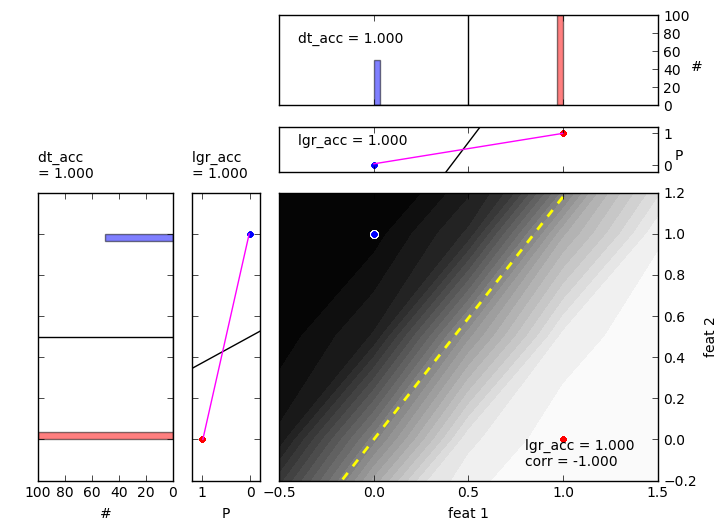

In [47]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.5, 3.2], width_ratios=[1, 0.5, 2.8], wspace=0.1, hspace=0.15)
(_1, _2, ax_xhist,
 _3, _4, ax_xlgr,
 ax_yhist, ax_ylgr, ax_scatter) = [plt.subplot(_) for _ in gs]
for _ in [_1, _2, _3, _4]:
    _.axis('off')

plot_xlgr(ax_xlgr, df)
plot_xhist(ax_xhist, df)

plot_ylgr(ax_ylgr, df)
plot_yhist(ax_yhist, df)

plot_scatter(ax_scatter, df)

for ax in [ax_xlgr, ax_xhist, ax_scatter]:
    ax.set_xlim(df.feat1.min() - 0.5, df.feat1.max() + 0.5)
    
for ax in [ax_ylgr, ax_yhist, ax_scatter]:
    ax.set_ylim(df.feat2.min() - 0.2, df.feat2.max() + 0.2)

# Systematic survey of the effect of covariance on the classification accuracy when combining and Feature 1 and Feature 2

Run the below two sets of means one at a time

In [48]:
feat1_n_mean, feat1_t_mean = [0, 1]
feat2_n_mean, feat2_t_mean = [1, 0]

In [49]:
feat1_n_mean, feat1_t_mean = [0, 1]
feat2_n_mean, feat2_t_mean = [0, 1]

# When two features are perfectly correlated

In [14]:
covs = np.arange(-1, 1, 0.02)
cat_corrs = []
accs = []
for cov_i in covs:
    cov = [[1, cov_i], [cov_i, 1]]
    samples_n = np.random.multivariate_normal([feat1_n_mean, feat2_n_mean], cov, 500)
    samples_t = np.random.multivariate_normal([feat1_t_mean, feat2_t_mean], cov, 500)
    df_n = pd.DataFrame(samples_n, columns=['feat1', 'feat2'])
    df_n['label'] = 0
    df_t = pd.DataFrame(samples_t, columns=['feat1', 'feat2'])
    df_t['label'] = 1
    df = pd.concat([df_n, df_t])
    cat_corrs.append(df.corr().values[0][1])
    
    fig = plt.figure(figsize=(8, 6))
    gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.5, 3.2], width_ratios=[1, 0.5, 2.8], wspace=0.1, hspace=0.15)
    (_1, _2, ax_xhist,
     _3, _4, ax_xlgr,
     ax_yhist, ax_ylgr, ax_scatter) = [plt.subplot(_) for _ in gs]
    for _ in [_1, _2, _3, _4]:
        _.axis('off')

    acc1 = plot_xlgr(ax_xlgr, df)
    plot_xhist(ax_xhist, df)

    acc2 = plot_ylgr(ax_ylgr, df)
    plot_yhist(ax_yhist, df)

    acc_both = plot_scatter(ax_scatter, df)
    
    for ax in [ax_xlgr, ax_xhist, ax_scatter]:
        ax.set_xlim(df.feat1.min() - 0.5, df.feat1.max() + 0.5)

    for ax in [ax_ylgr, ax_yhist, ax_scatter]:
        ax.set_ylim(df.feat2.min() - 0.2, df.feat2.max() + 0.2)
        
    accs.append((acc1, acc2, acc_both))
    output = '/tmp/cov_i_{0:.2f}.png'.format(cov_i)
    print(output, end=',')
    plt.savefig(output)
    plt.close()

/tmp/cov_i_-1.00.png,/tmp/cov_i_-0.98.png,/tmp/cov_i_-0.96.png,/tmp/cov_i_-0.94.png,/tmp/cov_i_-0.92.png,/tmp/cov_i_-0.90.png,/tmp/cov_i_-0.88.png,/tmp/cov_i_-0.86.png,/tmp/cov_i_-0.84.png,/tmp/cov_i_-0.82.png,/tmp/cov_i_-0.80.png,/tmp/cov_i_-0.78.png,/tmp/cov_i_-0.76.png,/tmp/cov_i_-0.74.png,/tmp/cov_i_-0.72.png,/tmp/cov_i_-0.70.png,/tmp/cov_i_-0.68.png,/tmp/cov_i_-0.66.png,/tmp/cov_i_-0.64.png,/tmp/cov_i_-0.62.png,/tmp/cov_i_-0.60.png,/tmp/cov_i_-0.58.png,/tmp/cov_i_-0.56.png,/tmp/cov_i_-0.54.png,/tmp/cov_i_-0.52.png,/tmp/cov_i_-0.50.png,/tmp/cov_i_-0.48.png,/tmp/cov_i_-0.46.png,/tmp/cov_i_-0.44.png,/tmp/cov_i_-0.42.png,/tmp/cov_i_-0.40.png,/tmp/cov_i_-0.38.png,/tmp/cov_i_-0.36.png,/tmp/cov_i_-0.34.png,/tmp/cov_i_-0.32.png,/tmp/cov_i_-0.30.png,/tmp/cov_i_-0.28.png,/tmp/cov_i_-0.26.png,/tmp/cov_i_-0.24.png,/tmp/cov_i_-0.22.png,/tmp/cov_i_-0.20.png,/tmp/cov_i_-0.18.png,/tmp/cov_i_-0.16.png,/tmp/cov_i_-0.14.png,/tmp/cov_i_-0.12.png,/tmp/cov_i_-0.10.png,/tmp/cov_i_-0.08.png,/tmp/cov_i_-0

In [15]:
df_acc = pd.DataFrame(accs, columns=['acc1', 'acc2', 'acc_both'])
df_acc['cat_corr'] = cat_corrs
df_acc['cov'] = covs

## Not opposite means

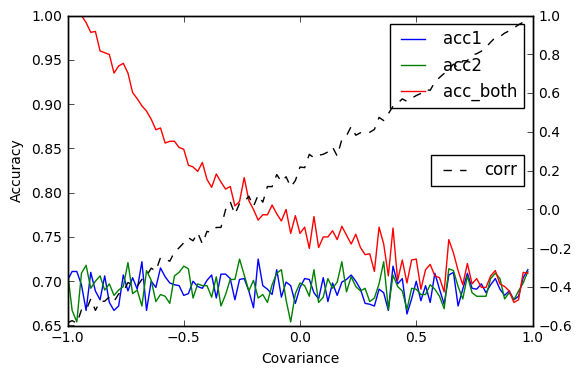

In [18]:
ax = plt.axes()
ax.plot(df_acc['cov'].values, df_acc.acc1.values, label='acc1')
ax.plot(df_acc['cov'].values, df_acc.acc2.values, label='acc2')
ax.plot(df_acc['cov'].values, df_acc.acc_both.values, label='acc_both')

ax.set_xlabel('Covariance')
ax.set_ylabel('Accuracy')
ax.legend(loc='best')

ax2 = ax.twinx()
ax2.plot(df_acc['cov'].values, df_acc.cat_corr.values, '--', color='black', label='corr')
ax2.legend(loc='center right')

### A more informative view

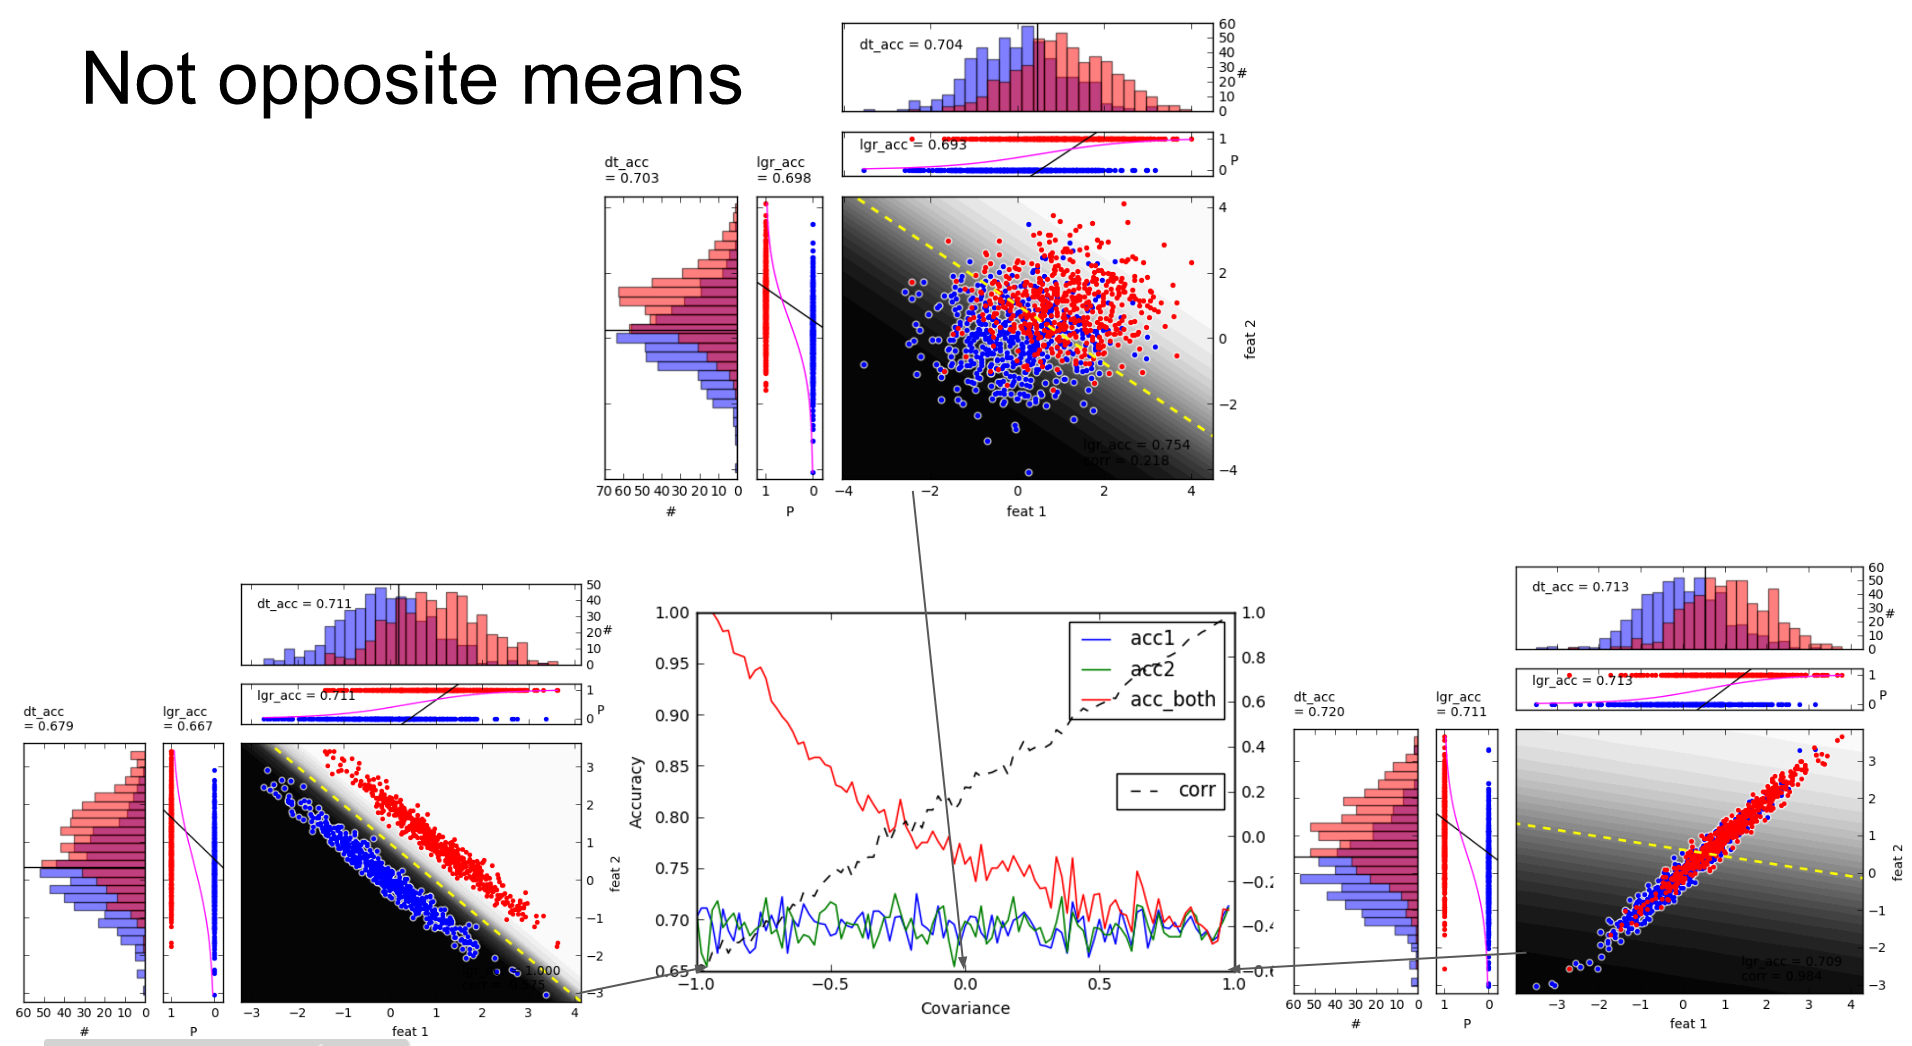

In [60]:
Image('./not-opposite-means.png')

# Opposite means

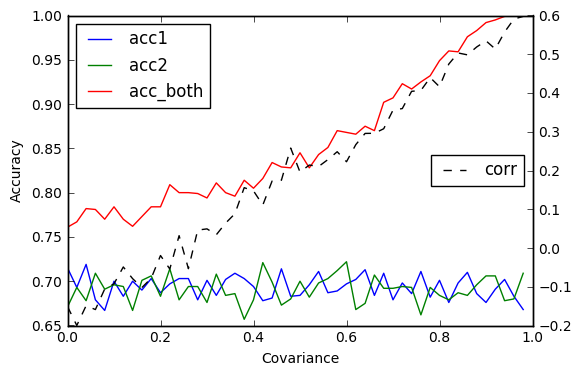

In [27]:
ax = plt.axes()
ax.plot(df_acc['cov'].values, df_acc.acc1.values, label='acc1')
ax.plot(df_acc['cov'].values, df_acc.acc2.values, label='acc2')
ax.plot(df_acc['cov'].values, df_acc.acc_both.values, label='acc_both')

ax.set_xlabel('Covariance')
ax.set_ylabel('Accuracy')
ax.legend(loc='best')

ax2 = ax.twinx()
ax2.plot(df_acc['cov'].values, df_acc.cat_corr.values, '--', color='black', label='corr')
ax2.legend(loc='center right')

### A more informative view

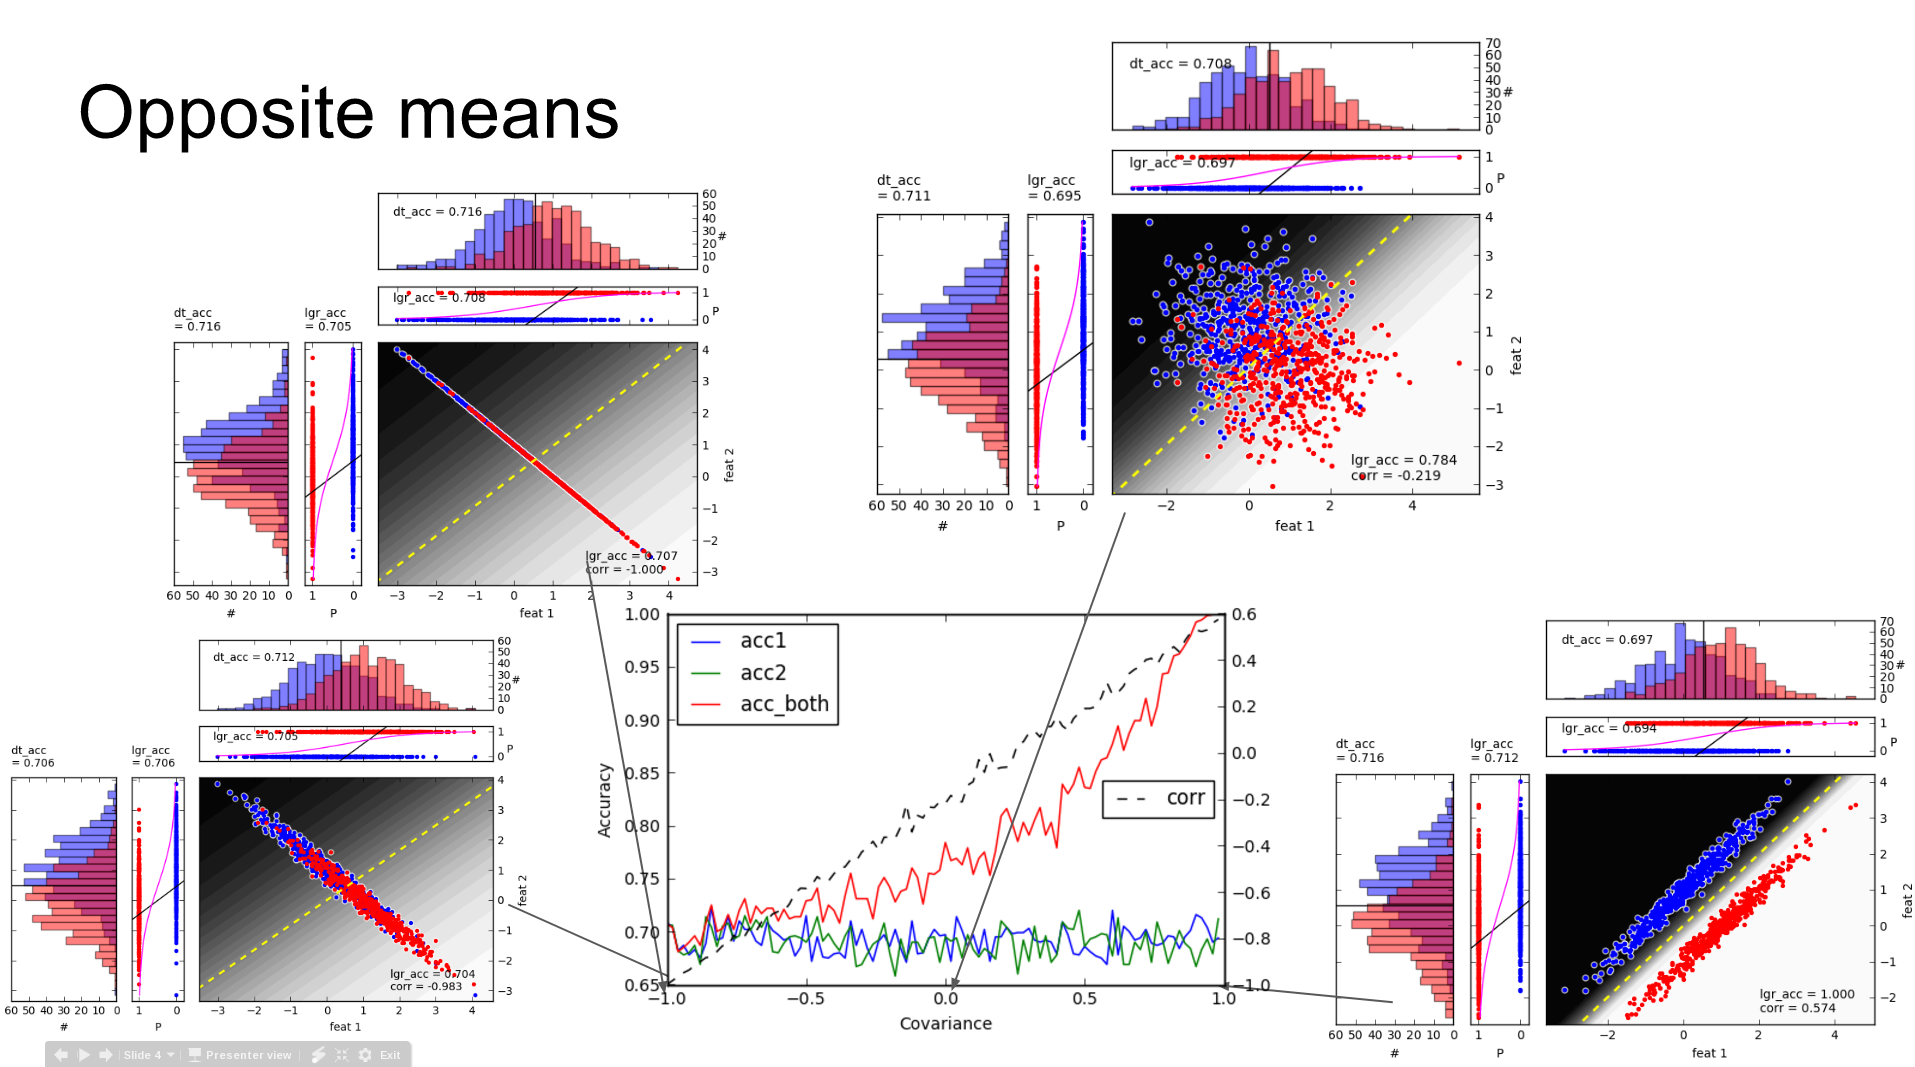

In [57]:
Image('./opposite-means.png')

**Summary**: It's not necessarily just about correlations among features that may or may not add to distinguishability. It's a complex interplay among covariance, variance, and means of the two features.